In [239]:
import numpy as np
"""
Credits: the original code belongs to Stanford CS231n course assignment1. Source link: http://cs231n.github.io/assignments2019/assignment1/
"""

class KNearestNeighbor:
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def fit(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                dists[i,j] = np.sqrt(np.sum(np.square(X[i] - self.X_train[j])))
                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            dist_temp = np.zeros((1, num_train))
            dist_temp = np.sqrt(np.sum(np.square(-self.X_train[np.arange(0,num_train),:]+X[i,:]), axis=1))
            dists[i] = dist_temp
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        matrix_split = np.vsplit(X,num_test)
        diff = np.vstack(-self.X_train+matrix_split)
        sum_square = (diff**2).sum(axis=1)
        dists = np.sqrt(sum_square).reshape(num_test,num_train)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            score = np.zeros(num_test)
            score = np.argsort(dists[i]).reshape(dists.shape[1],1)
            closest_y = np.zeros(k)
            closest_y = (self.y_train[score])[:k]
            print(score.shape)
            # print(dists[i][score])
            # print(self.y_train[score])
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            unique = np.asarray(np.unique (closest_y, return_counts= True ))
            y_pred[i] = unique[0, np.argmax(unique[1])]

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return y_pred

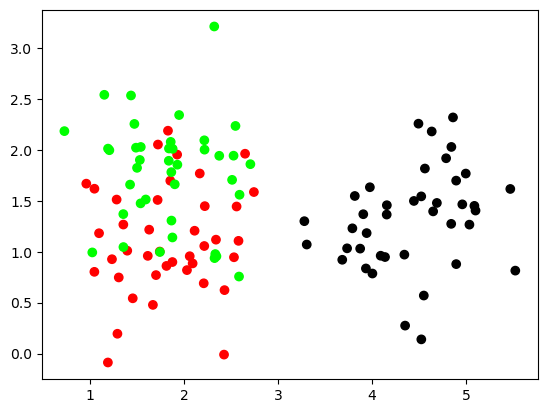

In [2]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

def generateData (numberOfClassEl, numberOfClasses):
    data = []
    data_x = []
    data_y = []
    for classNum in range(numberOfClasses):
        #Choose random center of 2-dimensional gaussian
        centerX, centerY = random.random()*5.0, random.random()*5.0
        #Choose numberOfClassEl random nodes with RMS=0.5
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
            data_x.append([random.gauss(centerX,0.5), random.gauss(centerY,0.5)])
            data_y.append([classNum])
    return data,data_x,data_y

def showData (nClasses, nItemsInClass):
    trainData, data_x, data_y = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#000000'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   
    return trainData, data_x, data_y

data, x, y = showData (3, 40)

In [5]:
x = np.asarray(x)
y = np.asarray(y)

In [7]:
y.shape

(120, 1)

In [254]:
x_test = np.asarray([[random.gauss(random.random()*5.0,0.5),random.gauss(random.random()*5.0,0.5)],
    [random.gauss(random.random()*5.0,0.5),random.gauss(random.random()*5.0,0.5)]])
x_test

array([[0.72872427, 2.17594319],
       [1.46183763, 3.61115527]])

In [255]:
knn = KNearestNeighbor()
knn.fit(x,y)
y_p_p = knn.predict(X=x_test, k=5, num_loops=2)
y_p_p

(120, 1)
(120, 1)


array([1., 1.])

In [231]:
y_p

array([2., 1.])

In [235]:
l = np.asarray(np.unique (c_p, return_counts= True ))
print(l)
np.argmax(l[1])
max_y = l[0,np.argmax(l[1])]
max_y

[[1]
 [1]]


1